In [ ]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam

# Библиотека для работы с массивами
import numpy as np

# Отрисовка графиков
import matplotlib.pyplot as plt

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from sklearn.datasets import load_wine

# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

##Описание базы

1. Датасет состоит из набора данных о винах и их классах.
2. Данные по одному вину хранятся в numpy-массиве `x_data`: (`13` параметров).
3. В датасете `3` класса вин: `y_data`.
4. Количество примеров: `178`.

In [ ]:
x_data = load_wine()['data']              # Загрузка набора данных о винах
y_data = load_wine()['target']            # Загрузка классов вин

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому вину:',x_data[0])
print('Класс вина:',y_data[0])

Размерность x_data - (178, 13)
Размерность y_data - (178,)

Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


##Подготовка данных

In [ ]:
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)

# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data,
                                                y_data,
                                                test_size=0.1,
                                                shuffle=True,
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную
x_train, x_val, y_train, y_val = train_test_split(x_all,
                                                  y_all,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state = 6)

print(x_train.shape)
print(y_train.shape)
print()
print(x_val.shape)
print(y_val.shape)

(144, 13)
(144, 3)

(16, 13)
(16, 3)


In [ ]:
def create_model():               #создаем функцию
    model = Sequential()           #собираем архитектуру сети
    model.add(Dense(200,input_dim=13,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(3,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=["accuracy"])

    return model



In [ ]:
model = create_model()       #обучающая выборка
history = model.fit(x_train,
                    y_train,
                    batch_size=5,
                    epochs=150,
                    verbose=1)
model.summary()

Epoch 1/150
29/29 [==============================] - 5s 5ms/step - loss: 2.3605 - accuracy: 0.4028
Epoch 2/150
29/29 [==============================] - 0s 5ms/step - loss: 0.9134 - accuracy: 0.5139
Epoch 3/150
29/29 [==============================] - 0s 5ms/step - loss: 0.7760 - accuracy: 0.6250
Epoch 4/150
29/29 [==============================] - 0s 5ms/step - loss: 0.6446 - accuracy: 0.6319
Epoch 5/150
29/29 [==============================] - 0s 5ms/step - loss: 0.7731 - accuracy: 0.6667
Epoch 6/150
29/29 [==============================] - 0s 5ms/step - loss: 0.6301 - accuracy: 0.7222
Epoch 7/150
29/29 [==============================] - 0s 5ms/step - loss: 1.9541 - accuracy: 0.6389
Epoch 8/150
29/29 [==============================] - 0s 4ms/step - loss: 2.4364 - accuracy: 0.5833
Epoch 9/150
29/29 [==============================] - 0s 5ms/step - loss: 1.1246 - accuracy: 0.6250
Epoch 10/150
29/29 [==============================] - 0s 4ms/step - loss: 1.9238 - accuracy: 0.6111
Epoch 11/

In [ ]:
model= create_model()#оценка качества обучения
history = model.fit(x_train,      #результат на проверочной выборке
                    y_train,
                    batch_size=5,
                    epochs=150,
                    validation_split=0.1,
                    verbose=1)

scores = model.evaluate(x_test,
                       y_test,
                       verbose=1)
print('Процент верных ответов на проверочных данных: ',round(scores[1],2)*100,'%')


Epoch 1/150
26/26 [==============================] - 1s 9ms/step - loss: 10.1185 - accuracy: 0.3953 - val_loss: 2.4199 - val_accuracy: 0.6000
Epoch 2/150
26/26 [==============================] - 0s 4ms/step - loss: 1.4122 - accuracy: 0.5969 - val_loss: 1.0841 - val_accuracy: 0.6000
Epoch 3/150
26/26 [==============================] - 0s 5ms/step - loss: 1.9495 - accuracy: 0.5736 - val_loss: 1.0499 - val_accuracy: 0.6000
Epoch 4/150
26/26 [==============================] - 0s 5ms/step - loss: 0.9909 - accuracy: 0.6434 - val_loss: 1.3517 - val_accuracy: 0.6000
Epoch 5/150
26/26 [==============================] - 0s 4ms/step - loss: 2.1114 - accuracy: 0.5271 - val_loss: 2.3585 - val_accuracy: 0.4667
Epoch 6/150
26/26 [==============================] - 0s 5ms/step - loss: 1.5406 - accuracy: 0.6047 - val_loss: 2.2097 - val_accuracy: 0.4000
Epoch 7/150
26/26 [==============================] - 0s 5ms/step - loss: 0.9183 - accuracy: 0.6667 - val_loss: 1.7784 - val_accuracy: 0.4667
Epoch 8/150


Построение графиков на протяжении всего обучения

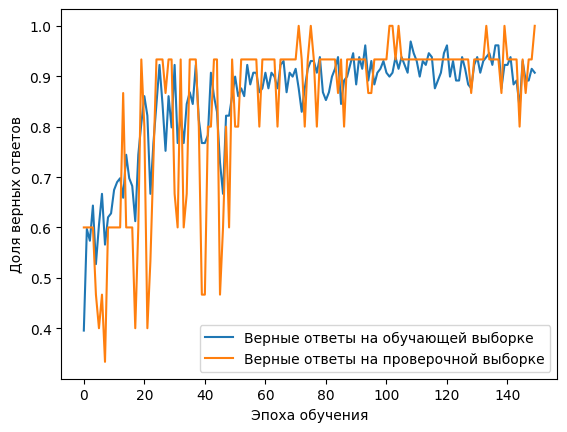

In [ ]:
plt.plot(history.history['accuracy'],    #визуализация обучвющей выборки
        label='Верные ответы на обучающей выборке')

plt.plot(history.history['val_accuracy'],    #визуализация проверочной выборки
        label='Верные ответы на проверочной выборке')

#подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()#вывод графика

Вывод графика ошибок

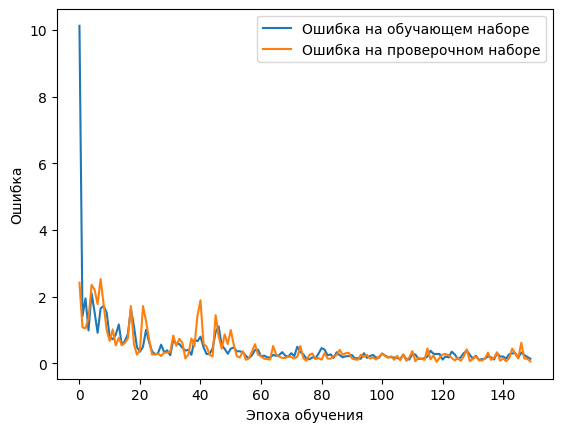

In [ ]:

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Вывод: из графика ошибок (наиболее важного) видно, что по эпохам ошибка на обучающей и проверочной выборках стремятся к 0 и совпадают. Это значит, что переобучения не происходит.